In [96]:
from tiny_data_wharehouse.data_wharehouse import DataWharehouse
tdw = DataWharehouse()

df = tdw.event('arxiv_papers')
df.sort_values(by='published', ascending=False)

,title,abstract,url,published,tdw_timestamp
0,Nearly Optimal Algorithms for Contextual Dueli...,Learning from human feedback plays an importan...,http://arxiv.org/abs/2404.10776v1,2024-04-16 17:59:55+00:00,2024-04-17 05:29:38.659094
0,COMBO: Compositional World Models for Embodied...,"In this paper, we investigate the problem of e...",http://arxiv.org/abs/2404.10775v1,2024-04-16 17:59:11+00:00,2024-04-17 05:29:31.838618
0,MiniCheck: Efficient Fact-Checking of LLMs on ...,Recognizing if LLM output can be grounded in e...,http://arxiv.org/abs/2404.10774v1,2024-04-16 17:59:10+00:00,2024-04-17 05:29:31.916151
0,Searching for cold gas traced by MgII quasar a...,Almost 50% of galaxies in the local Universe a...,http://arxiv.org/abs/2404.10773v1,2024-04-16 17:57:57+00:00,2024-04-17 05:30:13.286259
0,Gaussian Opacity Fields: Efficient and Compact...,"Recently, 3D Gaussian Splatting (3DGS) has dem...",http://arxiv.org/abs/2404.10772v1,2024-04-16 17:57:19+00:00,2024-04-17 05:30:22.282339
...,...,...,...,...,...
0,Wavelet basis for the Schrödinger equation,"The self-similar representation for the Schr\""...",http://arxiv.org/abs/quant-ph/9505013v1,1995-05-16 16:19:16+00:00,2024-04-03 13:26:18.561439
0,Extended Gauge Sectors,Present and future prospects for the discovery...,http://arxiv.org/abs/hep-ph/9501261v1,1995-01-10 21:40:12+00:00,2024-03-22 13:39:19.963503
0,Coherent States of the SU(N) groups,Coherent states $(CS)$ of the $SU(N)$ groups a...,http://arxiv.org/abs/hep-th/9208017v1,1992-08-05 16:17:28+00:00,2024-03-08 17:30:26.390463
0,From 2D conformal to 4D self-dual theories: qu...,It is shown that self-dual theories generalize...,http://arxiv.org/abs/hep-th/9207089v1,1992-07-27 16:02:00+00:00,2024-04-03 13:26:25.458203


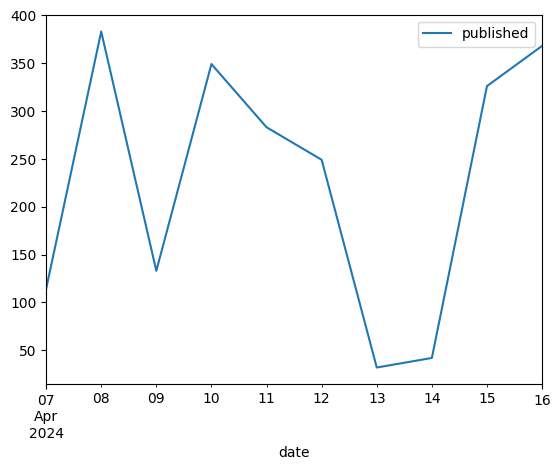

In [97]:
import pandas as pd
def plot_days(n_days):
    new_df = df.groupby(by=df.published.dt.date).agg({'published': 'count'})
    new_df['date'] = new_df.index
    new_df['published_count'] = new_df['published']


    NUM_OF_DAYS = 30
    new_df.reset_index(drop=True, inplace=True)
    new_df = new_df.sort_values(by='date', ascending=False).head(n_days)
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df.reset_index(drop=True, inplace=True)
    new_df.plot(x='date', y='published')
    
plot_days(10)

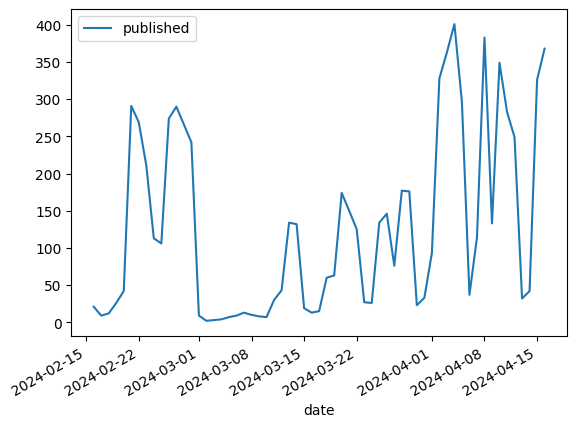

In [98]:
plot_days(60)